In [1]:
from logistic import *

 - https://www.youtube.com/watch?v=zGhrYMRAoCs
 - https://en.wikipedia.org/wiki/Logistic_function
 - 

Model:

$$ \frac{\mathrm{d}N}{\mathrm{d}t}=r N \left(1 - \frac{N}{K}\right) $$

$$ N(t) = \frac{K N_0 e^{rt}}{K + N_0 \left( e^{rt} - 1\right)} = \frac{K}{1+\left(\frac{K-N_0}{N_0}\right)e^{-rt}} $$

$$ \mathrm{d}N = \frac{\partial N}{\partial t}\mathrm{d}t + \frac{\partial N}{\partial r}\mathrm{d}r + \frac{\partial N}{\partial K}\mathrm{d}K + \frac{\partial N}{\partial N_0}\mathrm{d}N_0$$

$$
\begin{align}
\frac{\partial N}{\partial t} &= \frac{K N_0 (K-N_0) r e^{rt}}{\left(K + N_0(e^{rt} - 1)\right)^2} \\
\frac{\partial N}{\partial r} &= \frac{K N_0 (K-N_0) t e^{rt}}{\left(K + N_0(e^{rt} - 1)\right)^2} \\
\frac{\partial N}{\partial K} &= \frac{N_0^2 (e^{rt} - 1) e^{rt}}{\left(K + N_0(e^{rt} - 1)\right)^2} \\
\frac{\partial N}{\partial N_0} &= \frac{K^2e^{rt}}{\left(K + N_0(e^{rt} - 1)\right)^2} \\
\end{align}
$$

$$ \Delta N = \left|\frac{\partial N}{\partial t}\right|\Delta t + \left|\frac{\partial N}{\partial r}\right|\Delta r + \left|\frac{\partial N}{\partial K}\right|\Delta K + \left|\frac{\partial N}{\partial N_0}\right|\Delta N_0$$

$$
\frac{\partial^2 N}{\partial r^2} = \frac{K N_0 (K-N_0) t^2 (N_0e^{rt} + N_0 - K) e^{rt}}{\left(K + N_0(e^{rt} - 1)\right)^3} 
$$

$$\frac{\partial^2 N}{\partial r^2} = 0 \Rightarrow t = 0 \wedge tr = \log\left(\frac{K - N_0}{N_0}\right)$$

$$ Y_i = T(X_i) \,,\quad y = t(x) $$

$$ \mathbf{E}\left[Y^k\right] = \mu_{k}' = \int\limits_S t^k(x) f_X(x) \mathrm{d}x $$

$$ \mathbf{E}_\mathrm{U}\left[Y^k\right] = \frac{1}{b-a}\int\limits_{a}^{b} \left[\frac{K N_0 e^{rt}}{K + N_0 \left( e^{rt} - 1\right)}\right]^k \mathrm{d}r \quad|\, 0 < a < b$$

$$ \mathbf{E}_\mathcal{N}\left[Y^k\right] = \int\limits_{\mu - 6\sigma}^{\mu + 6\sigma} \left[\frac{K N_0 e^{rt}}{K + N_0 \left( e^{rt} - 1\right)}\right]^k \frac{e^{-\frac{1}{2}\left(\frac{r - \mu}{\sigma}\right)^2}}{\sigma\left(\Phi\left(6\right) - \Phi\left(-6\right)\right)} \mathrm{d}r  \quad|\, \mu - 6 \sigma > 0$$

In [2]:
p = np.array([10., 1.0, 1e7, 1e3])
dp = np.array([0.1, 0.05, 1e5, 50])
dp/p

array([0.01, 0.05, 0.01, 0.05])

In [3]:
error = Logistic.jacobian(*p)*dp
error

array([ 214738.77795773, 1073693.88978866,   47301.94628189,
        107380.12699157])

In [4]:
dNexp = np.sum(error)
dNexp

1443114.7410198539

In [5]:
Nexp = Logistic.N(*p)
Nexp

6877797.168020754

In [6]:
Nexp/p[3]

6877.797168020754

In [7]:
dNexp/Nexp

0.2098222302527051

In [8]:
rparam = np.arange(0.5, 1.5001, 0.05)
rlin = np.arange(0.5, 1.5001, 0.005)
tparam = np.arange(0.0, 30.0001, 1)
tlin = np.arange(0.0, 30.0001, 0.01)

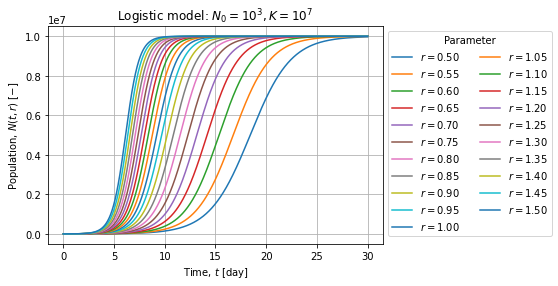

In [9]:
fig, axe = plt.subplots()
for r in rparam:
    axe.plot(tlin, Logistic.N(tlin, r=r), label=r"$r=%.2f$" % r)
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Population, $N(t, r)$ $[-]$")
axe.legend(ncol=2, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()

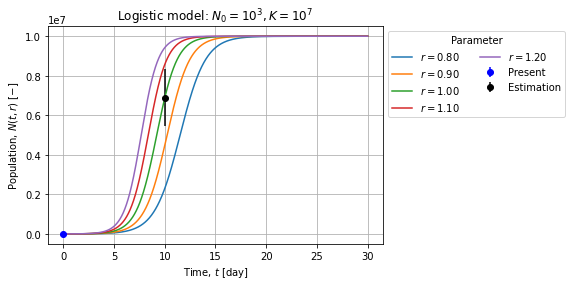

In [38]:
fig, axe = plt.subplots()
for r in rparam[6:16:2]:
    axe.plot(tlin, Logistic.N(tlin, r=r), label=r"$r=%.2f$" % r)
axe.errorbar(0, p[3], yerr=dp[3], fmt="o", color="blue", label="Present")
axe.errorbar(p[0], Nexp, yerr=dNexp, fmt="o", color="black", label="Estimation")
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Population, $N(t, r)$ $[-]$")
axe.legend(ncol=2, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()

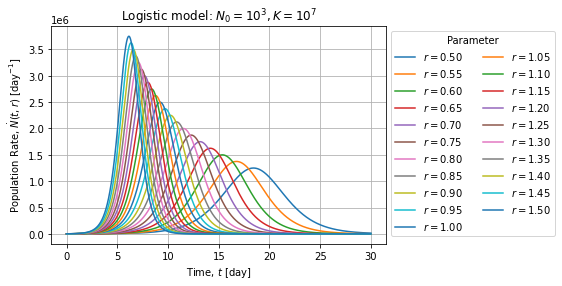

In [11]:
fig, axe = plt.subplots()
for r in rparam:
    axe.plot(tlin, Logistic.dNdt(tlin, r=r), label=r"$r=%.2f$" % r)
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Population Rate, $\dot{N}(t, r)$ $[\mathrm{day}^{-1}]$")
axe.legend(ncol=2, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()

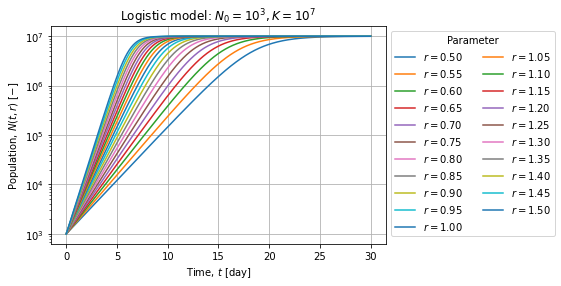

In [12]:
fig, axe = plt.subplots()
for r in rparam:
    axe.semilogy(tlin, Logistic.N(tlin, r=r), label=r"$r=%.2f$" % r)
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Population, $N(t, r)$ $[-]$")
axe.legend(ncol=2, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()

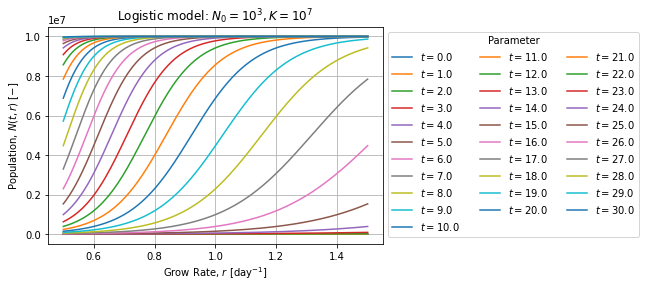

In [13]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, Logistic.N(t, r=rlin), label=r"$t=%.1f$" % t)
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Grow Rate, $r$ $[\mathrm{day}^{-1}]$")
axe.set_ylabel(r"Population, $N(t, r)$ $[-]$")
axe.legend(ncol=3, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()

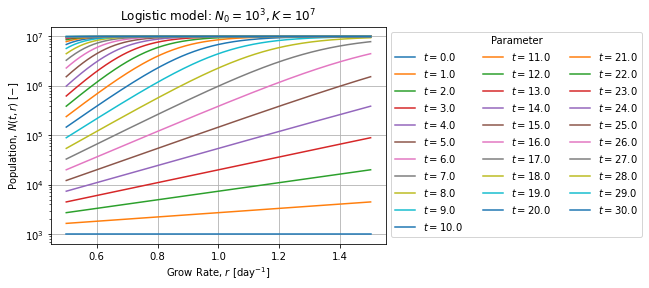

In [14]:
fig, axe = plt.subplots()
for t in tparam:
    axe.semilogy(rlin, Logistic.N(t, r=rlin), label=r"$t=%.1f$" % t)
axe.set_title("Logistic model: $N_0=10^3, K=10^7$")
axe.set_xlabel(r"Grow Rate, $r$ $[\mathrm{day}^{-1}]$")
axe.set_ylabel(r"Population, $N(t, r)$ $[-]$")
axe.legend(ncol=3, bbox_to_anchor=(1, 1), loc="upper left", title="Parameter")
axe.grid()